In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from random import randint

In [ ]:
import xlrd

In [ ]:
data = pd.read_excel('dataset.xlsx')

In [ ]:
data.head(10)

,Number,KDPI (%),KDPI (%) dichotomy,DGF & AKI by KDIGO (n),DGF & AKI by KDIGO,Graft failure (1),Death censoered Graft failure (1),Graft survival (year),Graft survival (month),patient death (1),Patient Survival (year),Patient Survival (month),Delayed graft function (1),Acute rejction (1),Death coading,Cause of death,Gender,Recipient age,BMI,Primary renal disease (n),HTN (1),DM (1),Prior KT (1),Dialysis (1),Dialysis duration (year),cold ischemic time (min),Maximum PRA,PRA sum,HLA mismatch number,Acute rejection History(1),Cause numbering,Patient death date (yyyy-mm-dd),Graft failure date(yyyy-mm-dd),Acute Rejection date,Date of biopsy,\nMonths to biopsy,Glomerular sclerosis(GS),Results of biopsy,Acute rejction,Number of Glomerulus,...,cv,mm,ptc,g+ptc,C4d,immunosuppressant,Cyclosporin,Tac,Induction,Basiliximab,ATG,op day,eGFR1d,eGFR2d,eGFR3d,eGFR1w,eGFR2w,eGFR1m,eGFR3m,eGFR6m,eGFR12m,eGFR2yr,eGFR3yr,Donor gender,Donor age,SCD(0) vs ECD(1),Marginal donor,Donor BMI,Donor_HTN (1),Donor_DM (1),donor CVA death,last 24hrs UO,oliguira (0),meanCVP,mMAP,Base Cr,F/u Cr,eGFR,SCD(0) vs ECD(1).1,Transplantation date
0,323,46,0,0,0.0,0,0,1.473973,25.180328,0,1.473973,25.180328,0.0,0,NaN,NaN,0,58,18.981170,4,0,0,0,1,8.591667,173.0,0.0,0.0,5.0,0,NaN,2017-04-30,2017-04-30,NaT,NaT,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,Basiliximab,1,0,2015-03-24,13.5287,27.2875,50.3862,83.4512,77.6424,108.6347,77.6424,61.0103,73.9164,NaN,NaN,0,41,0,0,13.00,0.0,0.0,1,7890.0,1.0,5.0,88.2,0.38,0.60,186.627896,0,2015-03-24
1,465,65,0,3,1.0,0,0,3.038356,36.460274,0,3.038356,36.460274,1.0,0,NaN,NaN,0,59,23.000000,3,1,0,0,1,16.500000,NaN,NaN,NaN,5.0,0,NaN,2017-04-30,2017-04-30,NaT,NaT,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,ATG,0,1,2013-08-31,7.7800,7.9400,6.9200,30.0000,60.2300,64.4400,65.7500,NaN,NaN,NaN,NaN,1,53,0,0,21.10,0.0,0.0,0,2547.0,0.0,17.0,36.0,0.38,0.59,177.151030,0,2013-08-31
2,466,78,1,3,1.0,1,1,0.235616,2.827397,0,3.038356,36.460274,1.0,1,NaN,NaN,1,48,26.080000,3,0,0,0,1,9.000000,526.0,44.0,84.0,4.0,1,NaN,2017-04-30,2013-11-25,2013-09-12,2013-09-12,1.0,1. Number of Glomerulus: 31\n2. Glomerular scl...,1) Acute antibody-mediated rejection II with a...,1,NaN,...,0.0,NaN,2.0,3.0,3.0,Tacrolimus,0,1,ATG,0,1,2013-08-31,5.2500,6.4800,6.9500,8.4700,8.7700,25.1400,9.3000,NaN,NaN,NaN,NaN,1,53,0,0,21.10,0.0,0.0,0,2547.0,0.0,17.0,36.0,0.38,0.59,177.151030,0,2013-08-31
3,442,70,1,0,0.0,0,0,4.471233,53.654795,0,4.471233,53.654795,0.0,1,NaN,NaN,1,39,22.760000,3,1,0,0,1,7.000000,309.0,NaN,NaN,3.0,1,NaN,2017-04-30,2017-04-30,2013-08-12,NaT,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,Basiliximab,1,0,2012-03-26,7.5100,22.9500,66.0800,123.0800,147.0500,147.0500,92.1000,97.0600,78.8200,NaN,NaN,0,45,0,0,22.49,1.0,1.0,0,5915.0,0.0,10.0,77.0,0.40,0.35,172.608661,0,2012-03-26
4,439,38,0,3,1.0,0,0,4.649315,55.791781,0,4.649315,55.791781,1.0,0,NaN,NaN,0,54,18.420000,3,1,0,0,1,5.730000,280.0,NaN,NaN,2.0,0,NaN,2017-04-30,2017-04-30,NaT,NaT,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,Basiliximab,1,0,2012-01-21,8.5200,8.9800,8.3800,11.3600,29.7800,45.2700,63.0900,77.8700,69.0300,NaN,NaN,1,42,0,0,19.26,0.0,0.0,1,7890.0,0.0,5.0,107.0,0.43,0.80,161.027389,0,2012-01-21
5,377,39,0,0,0.0,0,0,0.523288,13.803279,0,0.523288,13.803279,0.0,0,NaN,NaN,1,66,20.342798,2,1,0,1,1,3.988889,209.0,75.0,75.0,0.0,0,NaN,2017-04-30,2017-04-30,NaT,NaT,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,Basiliximab,1,0,2016-03-05,23.1806,33.2054,35.5623,44.9469,70.7429,76.1405,64.2897,54.8388,NaN,NaN,NaN,0,37,0,0,13.80,0.0,0.0,1,2685.0,1.0,9.9,101.3,0.44,0.43,160.898730,0,2016-03-05
6,324,45,0,1,NaN,0,0,1.471233,25.147541,0,1.471233,25.147541,0.0,0,NaN,NaN,0,55,22.151681,4,1,0,0,1,17.430556,136.0,100.0,100.0,5.0,0,NaN,2017-04-30,2017-04-30,NaT,NaT,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Tacrolimus,0,1,ATG,0,1,2015-03-25,8.0665,7.2596,7.2274,11.2731,29.2291,49.3472,48.2175,59.9667,62.0328,NaN,NaN,0,27,0,0,19.90,1.0,0.0,1,3890.0,1.0,13.0,105.6,0.5

In [ ]:
data.columns

Index(['Number', 'KDPI (%)', 'KDPI (%) dichotomy', 'DGF & AKI by KDIGO (n)',
       'DGF & AKI by KDIGO', 'Graft failure (1)',
       'Death censoered Graft failure (1)', 'Graft survival (year)',
       'Graft survival (month)', 'patient death (1)',
       'Patient Survival (year)', 'Patient Survival (month)',
       'Delayed graft function (1)', 'Acute rejction (1)', 'Death coading',
       'Cause of death', 'Gender', 'Recipient age', 'BMI',
       'Primary renal disease (n)', 'HTN (1)', 'DM (1)', 'Prior KT (1)',
       'Dialysis (1)', 'Dialysis duration (year)', 'cold ischemic time (min)',
       'Maximum PRA', 'PRA sum', 'HLA mismatch number',
       'Acute rejection History(1)', 'Cause numbering',
       'Patient death date (yyyy-mm-dd)', 'Graft failure date(yyyy-mm-dd)',
       'Acute Rejection date ', 'Date of biopsy', '\nMonths to biopsy ',
       'Glomerular sclerosis(GS)', 'Results of biopsy', 'Acute rejction',
       'Number of Glomerulus ', 'GS (%)', 'Segmental GS (%)', 'Glo

# Dropping Columns we Don't need or are duplicated

In [ ]:
dataset = data.drop(['Number', 'DGF & AKI by KDIGO (n)', 'KDPI (%) dichotomy', 'Graft survival (year)',
       'DGF & AKI by KDIGO', 'Graft failure (1)',
       'Death censoered Graft failure (1)', 'Graft survival (month)', 'patient death (1)',
       'Patient Survival (year)', 'Patient Survival (month)', 'Death coading',  'Cause of death', 'Cause numbering',
       'Patient death date (yyyy-mm-dd)', 'Graft failure date(yyyy-mm-dd)',
       'Acute Rejection date ', 'Date of biopsy', '\nMonths to biopsy ',
       'Glomerular sclerosis(GS)', 'Results of biopsy', 'Acute rejction',
       'Number of Glomerulus ', 'GS (%)', 'Segmental GS (%)', 'Global GS (%)',
       'g', 't', 'i', 'v', 'ah', 'ti', 'cg', 'ct', 'ci', 'ct+ci', 'cv', 'mm',
       'ptc', 'g+ptc', 'C4d', 'immunosuppressant', 'Induction ', 'op day', 'eGFR3m', 'eGFR6m', 'eGFR12m',
       'eGFR2yr', 'eGFR3yr', 'last 24hrs UO', 'SCD(0) vs ECD(1).1', 'Transplantation date'], axis = 1)

In [ ]:
dataset.columns

Index(['KDPI (%)', 'Delayed graft function (1)', 'Acute rejction (1)',
       'Gender', 'Recipient age', 'BMI', 'Primary renal disease (n)',
       'HTN (1)', 'DM (1)', 'Prior KT (1)', 'Dialysis (1)',
       'Dialysis duration (year)', 'cold ischemic time (min)', 'Maximum PRA',
       'PRA sum', 'HLA mismatch number', 'Acute rejection History(1)',
       'Cyclosporin', 'Tac', 'Basiliximab', 'ATG', 'eGFR1d', 'eGFR2d',
       'eGFR3d', 'eGFR1w', 'eGFR2w', 'eGFR1m', 'Donor gender', 'Donor age',
       'SCD(0) vs ECD(1)', 'Marginal donor', 'Donor BMI', 'Donor_HTN (1)',
       'Donor_DM (1)', 'donor CVA death', 'oliguira (0)', 'meanCVP', 'mMAP',
       'Base Cr', 'F/u Cr', 'eGFR'],
      dtype='object')

In [ ]:
len(dataset.columns)

41

In [ ]:
dataset.shape

(463, 41)

# Looking for nan or missing Values

In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dfnan = dataset[dataset.isna().any(axis=1)]

In [ ]:
dfnan.head()

,KDPI (%),Delayed graft function (1),Acute rejction (1),Gender,Recipient age,BMI,Primary renal disease (n),HTN (1),DM (1),Prior KT (1),Dialysis (1),Dialysis duration (year),cold ischemic time (min),Maximum PRA,PRA sum,HLA mismatch number,Acute rejection History(1),Cyclosporin,Tac,Basiliximab,ATG,eGFR1d,eGFR2d,eGFR3d,eGFR1w,eGFR2w,eGFR1m,Donor gender,Donor age,SCD(0) vs ECD(1),Marginal donor,Donor BMI,Donor_HTN (1),Donor_DM (1),donor CVA death,oliguira (0),meanCVP,mMAP,Base Cr,F/u Cr,eGFR
1,65,1.0,0,0,59,23.00,3,1,0,0,1,16.50,NaN,NaN,NaN,5.0,0,0,1,0,1,7.78,7.94,6.92,30.00,60.23,64.44,1,53,0,0,21.10,0.0,0.0,0,0.0,17.0,36.0,0.38,0.59,177.151030
3,70,0.0,1,1,39,22.76,3,1,0,0,1,7.00,309.0,NaN,NaN,3.0,1,0,1,1,0,7.51,22.95,66.08,123.08,147.05,147.05,0,45,0,0,22.49,1.0,1.0,0,0.0,10.0,77.0,0.40,0.35,172.608661
4,38,1.0,0,0,54,18.42,3,1,0,0,1,5.73,280.0,NaN,NaN,2.0,0,0,1,1,0,8.52,8.98,8.38,11.36,29.78,45.27,1,42,0,0,19.26,0.0,0.0,1,0.0,5.0,107.0,0.43,0.80,161.027389
9,69,0.0,1,0,49,22.51,3,1,0,0,1,6.00,360.0,NaN,NaN,5.0,1,0,1,1,0,6.00,15.57,22.95,51.08,66.08,66.08,1,52,0,1,18.03,1.0,0.0,0,0.0,12.0,118.0,0.47,NaN,139.152927
13,3,0.0,0,0,48,23.71,2,1,0,0,1,10.00,360.0,NaN,NaN,5.0,0,0,1,1,0,7.85,31.19,51.08,92.10,105.51,105.51,0,18,0,0,20.45,0.0,0.0,1,0.0,6.0,85.0,0.61,0.68,127.747087


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
iterative_imp = IterativeImputer()
iterative_imp.fit(dataset)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:
dataset1 = iterative_imp.fit_transform(dataset)
data1 = pd.DataFrame(data=dataset1, columns= dataset.columns,)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
data1.isnull().values.any()

False

# First classifier as a test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
X = data1.drop('Acute rejction (1)', axis = 1)
y = data1['Acute rejction (1)']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8201438848920863

In [ ]:
y_pred = rf.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.0631379068607028

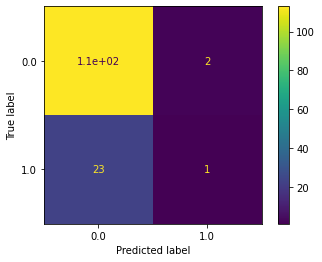

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

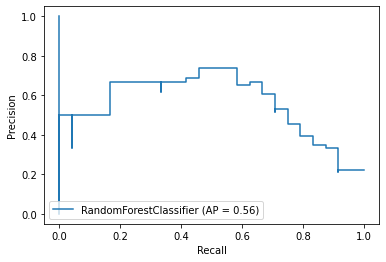

In [ ]:
plot_precision_recall_curve(rf, X_test, y_test)

#### XGBOOST Classifier

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8633093525179856

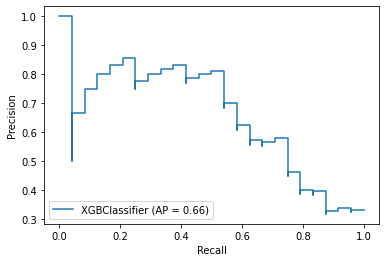

In [ ]:
plot_precision_recall_curve(xgb, X_test, y_test)

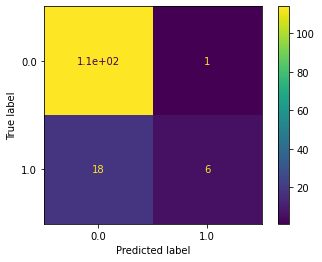

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show() 

In [ ]:
y_pred = xgb.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.4170457526419913

## Dummy Classifier as baseline

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.6834532374100719

In [ ]:
y_pred = dummy_clf.predict(X_test)
matthews_corrcoef(y_test, y_pred)

-0.11480978420721642

# Plotting the data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


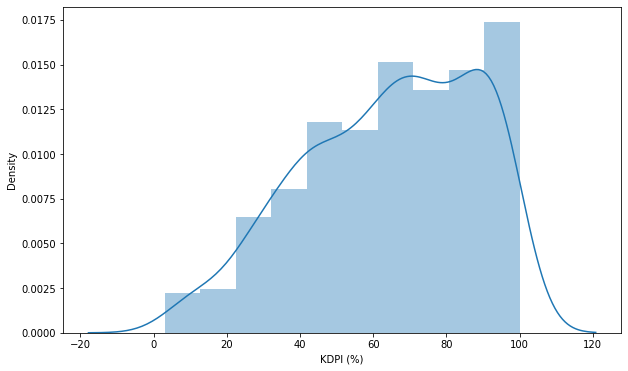

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


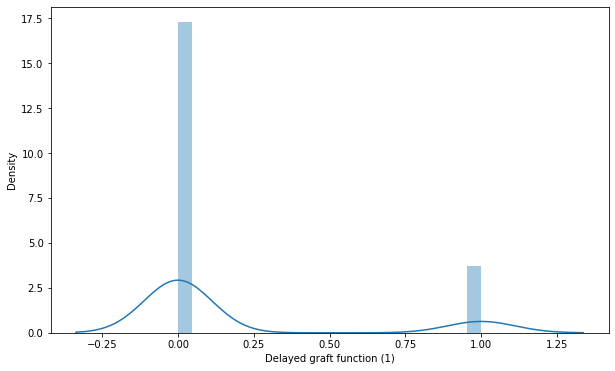

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


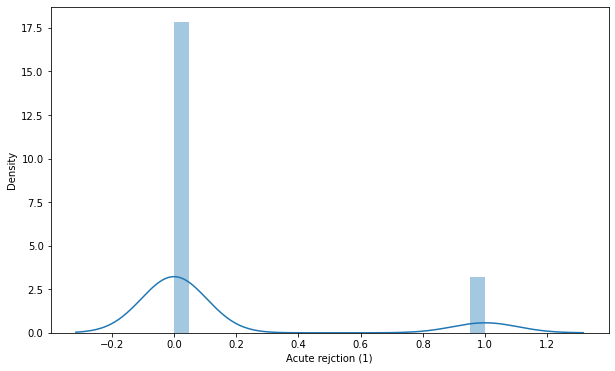

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


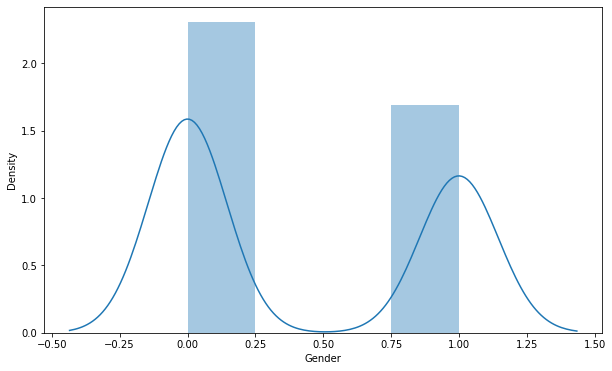

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


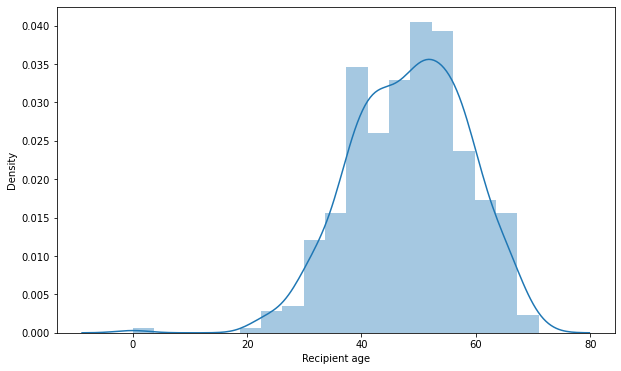

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


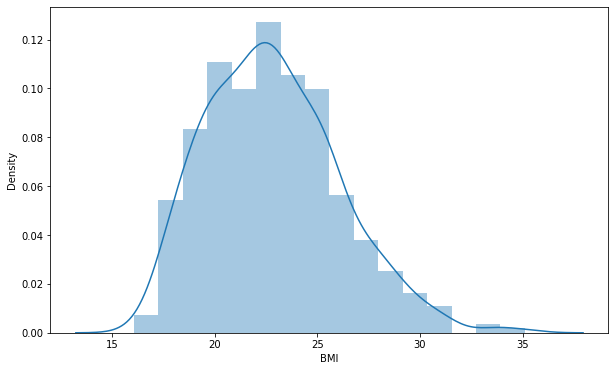

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


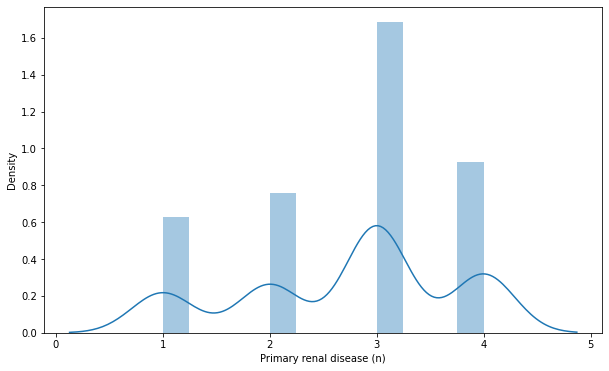

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


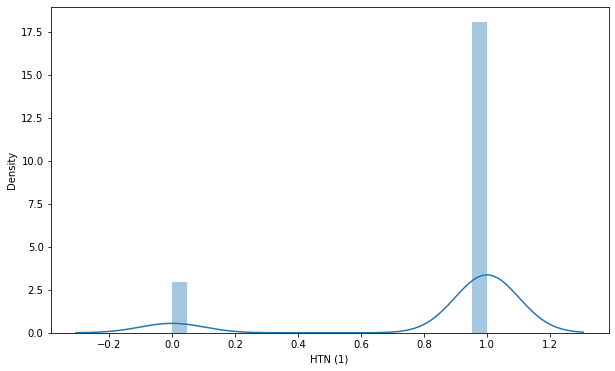

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


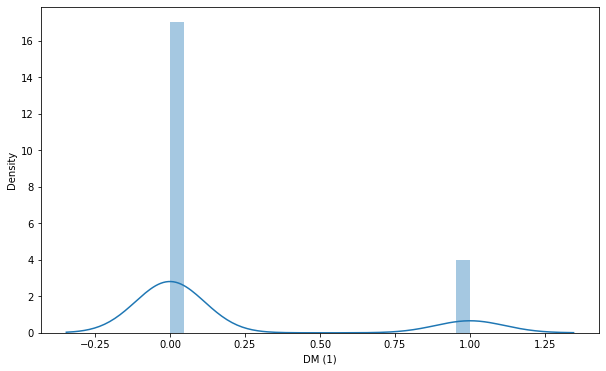

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


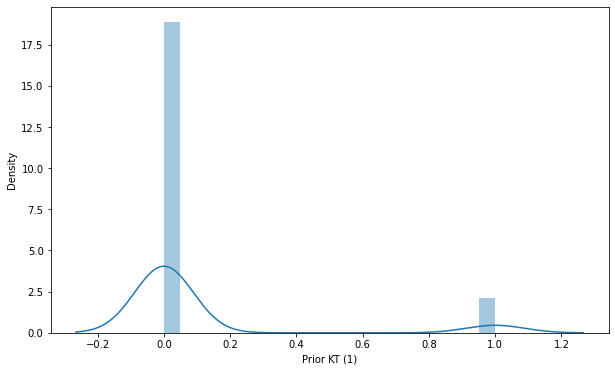

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


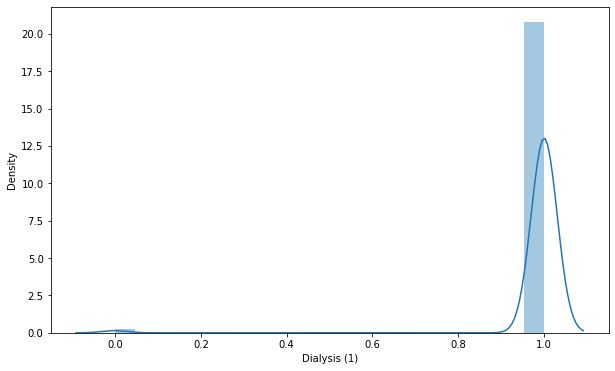

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


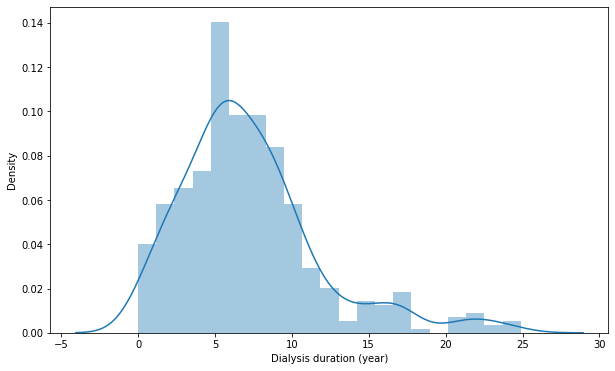

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


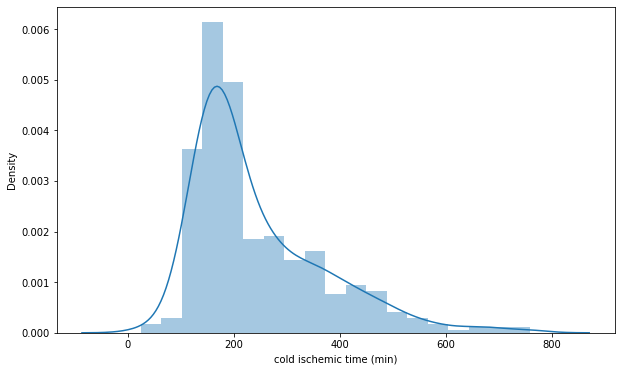

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


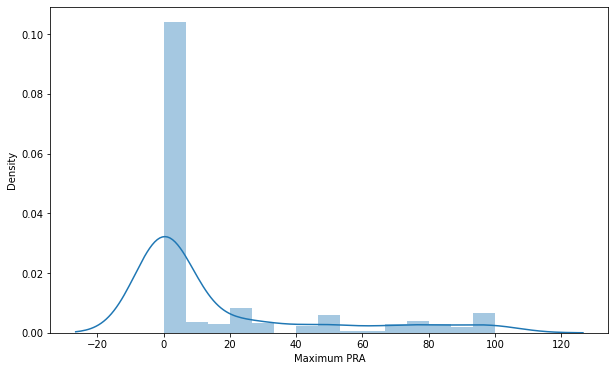

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


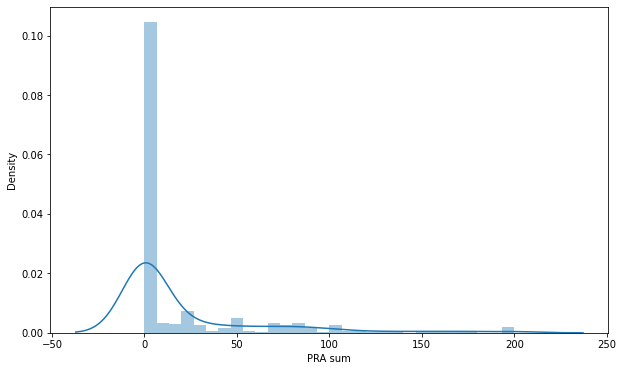

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


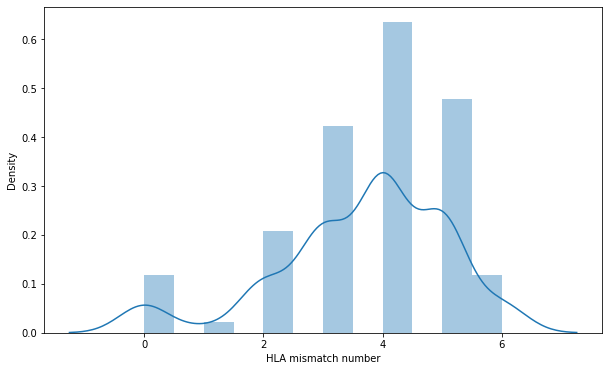

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


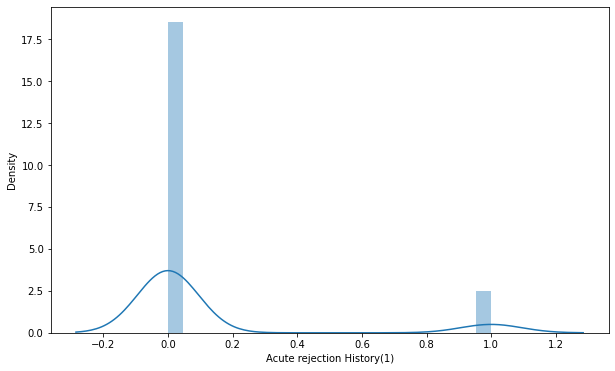

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


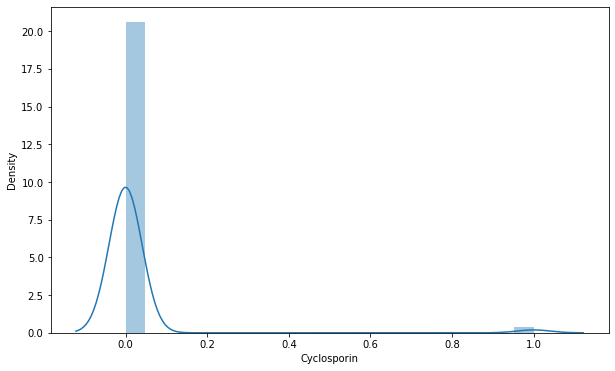

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


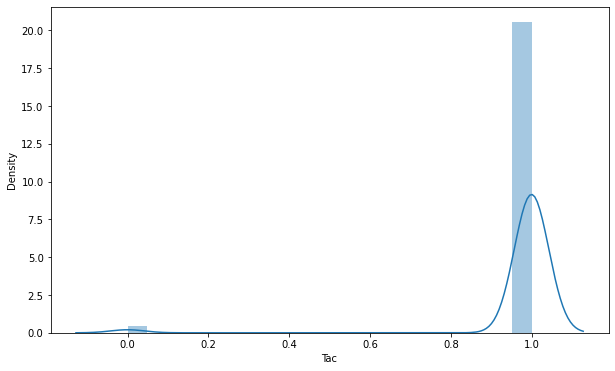

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


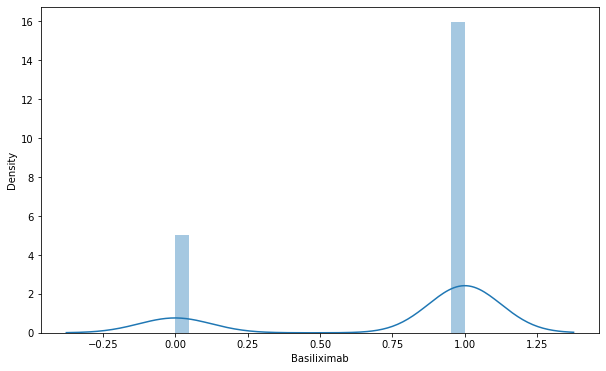

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


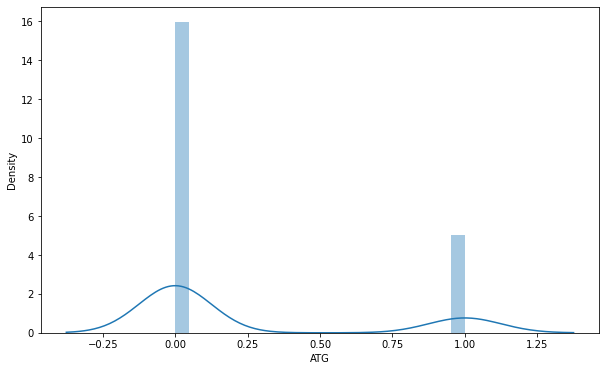

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


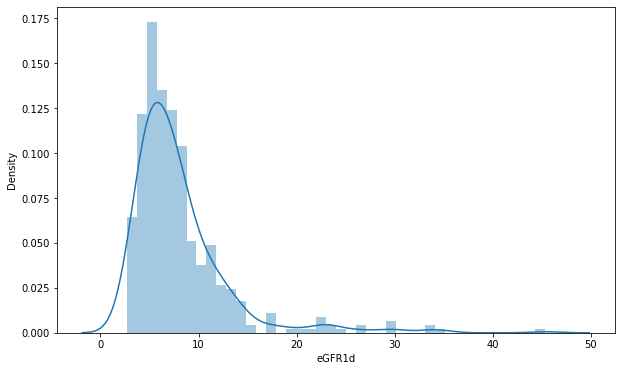

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


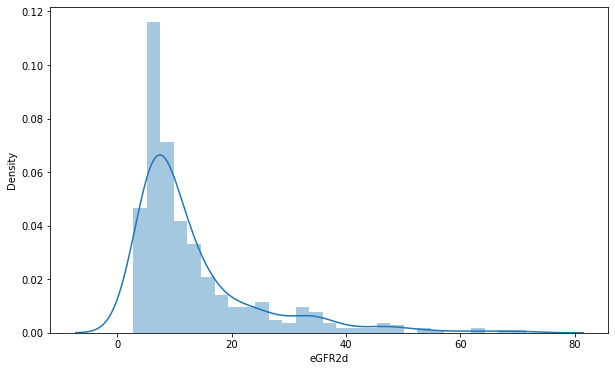

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


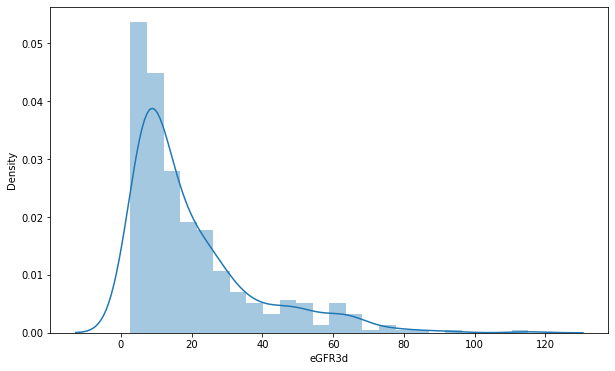

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


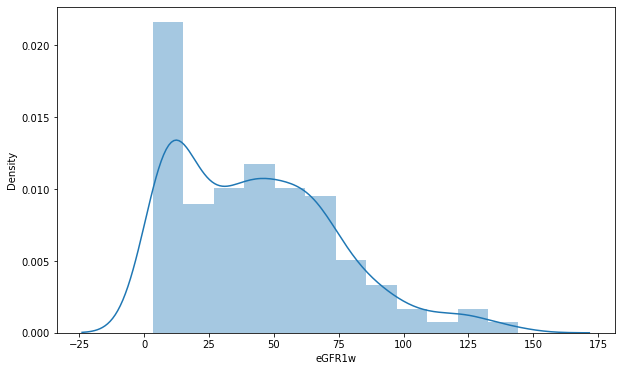

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


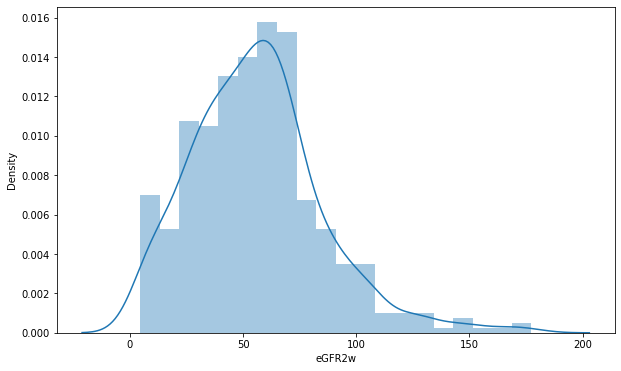

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


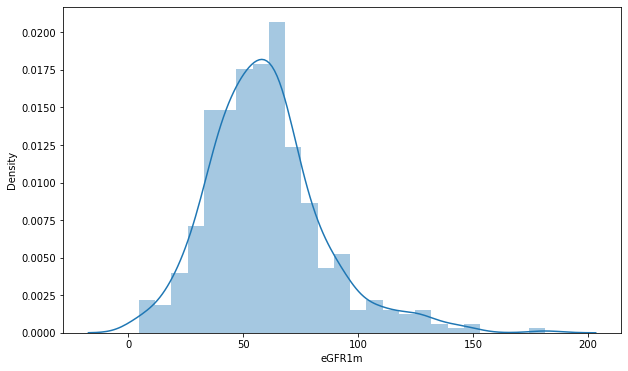

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


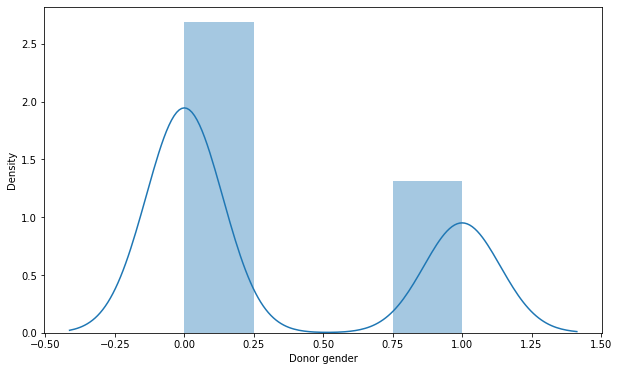

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


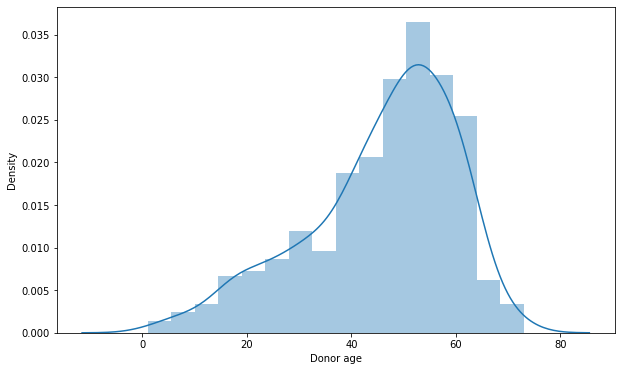

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


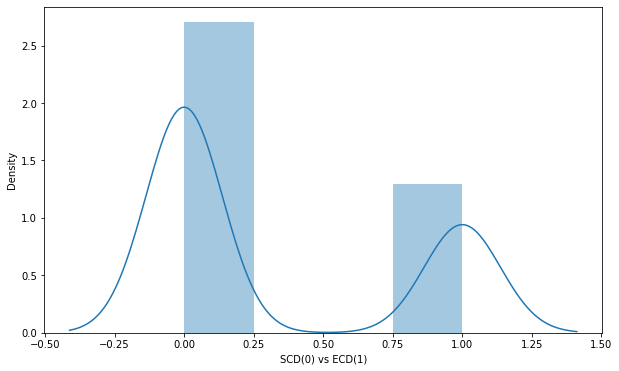

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


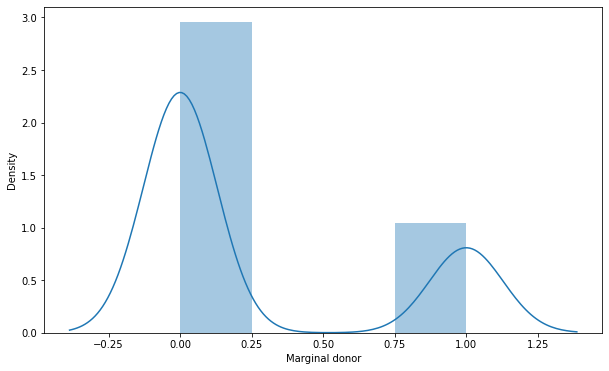

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


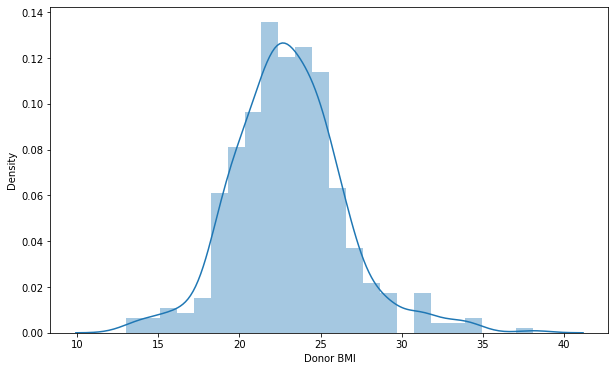

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


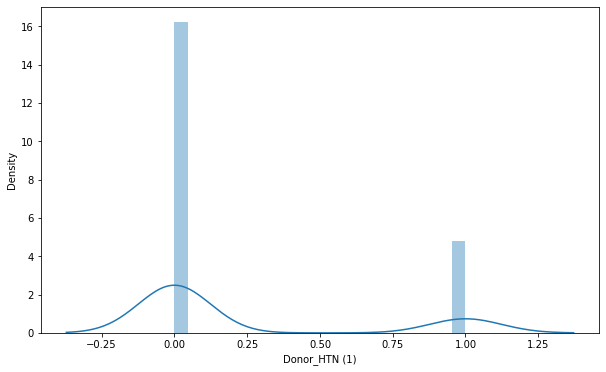

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


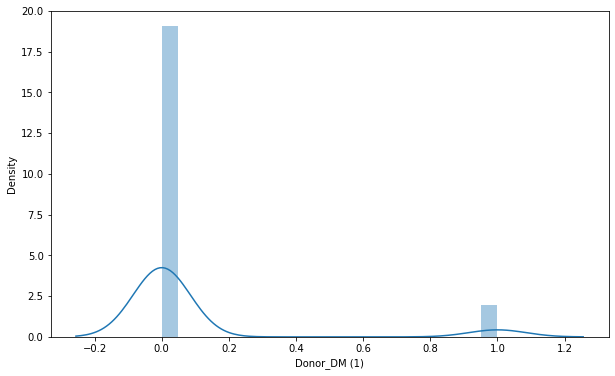

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


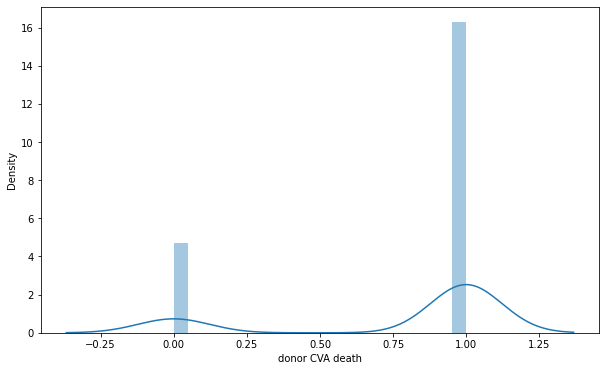

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


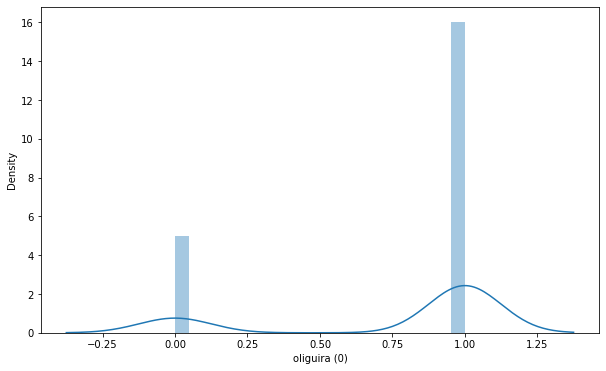

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


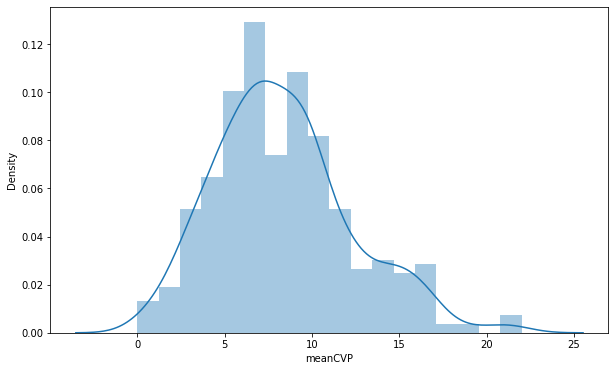

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


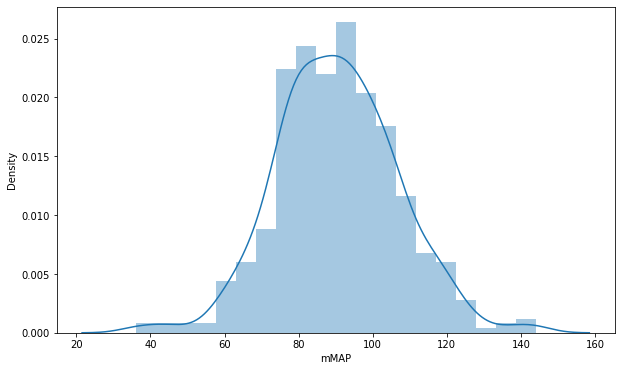

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


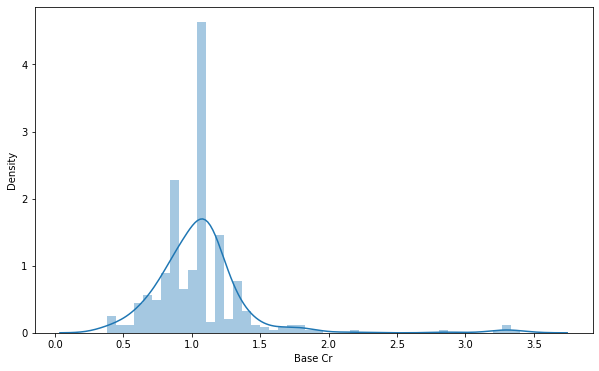

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


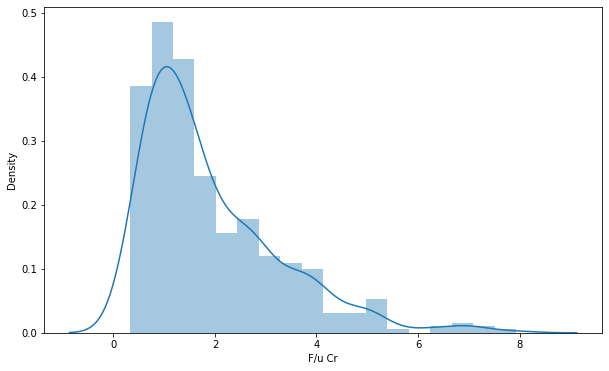

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


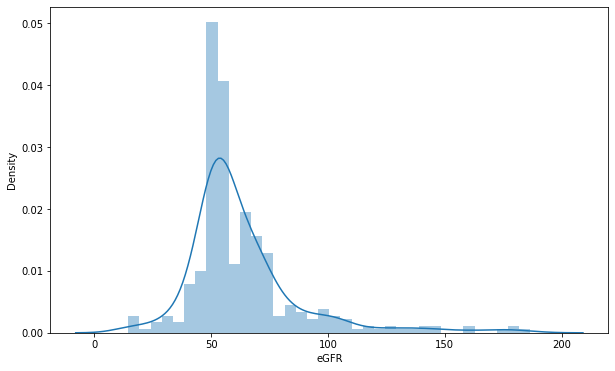

In [ ]:
import seaborn as sns
for i in data1.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[i])
    plt.show()
    plt.close()

## Correlation Matrix

In [ ]:
datacorr = data1.corr()
datacorr1 = data1.corr(method='pearson').unstack().sort_values(ascending=False).drop_duplicates()
datacorr2 = pd.DataFrame(data=datacorr1)
datacorr2.loc[datacorr2[0] > 0.4]

,,0
eGFR,eGFR,1.000000
PRA sum,Maximum PRA,0.942166
eGFR3d,eGFR2d,0.903299
Donor age,KDPI (%),0.850041
eGFR2w,eGFR1w,0.837334
eGFR3d,eGFR1w,0.812629
eGFR1d,eGFR2d,0.776525
eGFR1m,eGFR2w,0.749615
SCD(0) vs ECD(1),Marginal donor,0.722671
KDPI (%),SCD(0) vs ECD(1),0.701469


## Dropping highly dependant columns

In [ ]:
data2 = data1.drop('Maximum PRA', axis = 1)

### We will also fuse all of the glomerular filtration rate, and put it as as filtration rate after transplant. 

In [ ]:
data2['Post_Transplant_GFR'] = (data2.eGFR1d + data2.eGFR2d + data2.eGFR3d + data2.eGFR1w + data2.eGFR2w + data2.eGFR1m) / 6 

In [ ]:
data2.drop(['eGFR1d', 'eGFR2d','eGFR3d', 'eGFR1w', 'eGFR2w', 'eGFR1m'], axis = 1, inplace = True)

In [ ]:
data2.columns

Index(['KDPI (%)', 'Delayed graft function (1)', 'Acute rejction (1)',
       'Gender', 'Recipient age', 'BMI', 'Primary renal disease (n)',
       'HTN (1)', 'DM (1)', 'Prior KT (1)', 'Dialysis (1)',
       'Dialysis duration (year)', 'cold ischemic time (min)', 'PRA sum',
       'HLA mismatch number', 'Acute rejection History(1)', 'Cyclosporin',
       'Tac', 'Basiliximab', 'ATG', 'Donor gender', 'Donor age',
       'SCD(0) vs ECD(1)', 'Marginal donor', 'Donor BMI', 'Donor_HTN (1)',
       'Donor_DM (1)', 'donor CVA death', 'oliguira (0)', 'meanCVP', 'mMAP',
       'Base Cr', 'F/u Cr', 'eGFR', 'Post_Transplant_GFR'],
      dtype='object')

# Loops looking for matthew score

In [ ]:
X = data2.drop('Acute rejction (1)', axis = 1)
y = data2['Acute rejction (1)']

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
rf = RandomForestClassifier()
matthewmean = []
accuracymean = []
f1 = []

In [ ]:
!pip install imblearn 

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  rf.fit(X_train, y_train)
  y_preds = rf.predict(X_test)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = rf.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.3061209365134209

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8593525179856114

In [ ]:
f1mean = np.mean(f1)
f1mean

0.30224502433169464

## XGBoost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb = XGBClassifier()
matthewmean = []
accuracymean = []
f1 = []

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  xgb.fit(X_train, y_train)
  y_preds = xgb.predict(X_test)
  matthewscore = matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = xgb.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.4132279685923481

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8716546762589928

In [ ]:
f1mean = np.mean(f1)
f1mean

0.4493648461763774

## Bagging Forest Balanced

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(n_estimators=100, random_state=0)

accuracymean = []
f1 = []
matthewmean= []

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  bbc.fit(X_train, y_train)
  y_preds = bbc.predict(X_test)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = bbc.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.5158890602652589

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8756115107913668

In [ ]:
f1mean = np.mean(f1)
f1mean

0.5836308326030726

## ADA boost balanced

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

In [ ]:
clf = RUSBoostClassifier(random_state=0)

In [ ]:
matthewmean = []
accuracymean = []
f1 = []

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
  clf.fit(X_train, y_train)
  y_preds = clf.predict(X_test)
  matthewscore = matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = clf.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.2161110582441464

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8261151079136689

In [ ]:
f1mean = np.mean(f1)
f1mean

0.29151196240616245

# Now let's do a ranking for columns

In [ ]:
import RFEClassifier as rfe

In [ ]:
ranking = rfe.RankingRE(X, y, 100)

In [ ]:
rank = ranking.ranking_borda_BalancedBagging()
rank

In [ ]:
ranking.ranking_by_matthew_punishment_rf()

In [ ]:
Xgbranking = ranking.ranking_borda_xgboost()
Xgbranking

In [ ]:
xgbmatthew = ranking.ranking_by_matthew_punishment_xgb()
xgbmatthew

,Categories,average-mtt-punishment,ranking,SD_of_mtt_punishment
27,oliguira (0),2.4951157524956135e-05,1.0,0.0598207574969441
14,Acute rejection History(1),0.33714197617365294,2.0,0.12420800700897477
10,Dialysis duration (year),0.054070430789647246,3.0,0.0727554511582092
12,PRA sum,0.044280608856934085,4.0,0.08469333277779541
20,Donor age,0.00791282677780399,5.0,0.05318625981281889
8,Prior KT (1),0.007113689806488561,6.0,0.03741691443306016
5,Primary renal disease (n),0.004614944457108146,7.0,0.055023064659373365
19,Donor gender,0.0033516339317273547,8.0,0.04930070196141898
1,Delayed graft function (1),0.0027961628651128776,9.0,0.05680027129712492
29,mMAP,0.002466676284680639,10.0,0.06015495986678111


# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

## SMOTE and Balanced bagging

In [ ]:
X = data2.drop('Acute rejction (1)', axis = 1)
y = data2['Acute rejction (1)']
bbc = BalancedBaggingClassifier(n_estimators=50, random_state=0)
matthewmean = []
accuracymean = []
f1 = []
sc = StandardScaler()

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  X_train_smo, y_train_smo = SMOTE().fit_resample(X_train, y_train)
  bbc.fit(X_train_smo, y_train_smo)
  y_preds = bbc.predict(X_test)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = bbc.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.4435393678952731

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.863884892086331

In [ ]:
f1mean = np.mean(f1)
f1mean

0.5148776658088137

## Smote + XGBOOST

In [ ]:
xgb = XGBClassifier()
matthewmean = []
accuracymean = []
f1 = []
X = data2.drop('Acute rejction (1)', axis = 1)
y = data2['Acute rejction (1)']

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  X_train_smo, y_train_smo = SMOTE().fit_resample(X_train, y_train)
  xgb.fit(X_train_smo, y_train_smo)
  #Using .values because SMOTE convert the pandas dataframe to a numpy array.
  y_preds = xgb.predict(X_test.values)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = xgb.score(X_test.values, y_test.values)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.46214592378494074

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.874820143884892

In [ ]:
f1mean = np.mean(f1)
f1mean

0.5217657165443824

## ADASYN + XGBoost

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
xgb = XGBClassifier()
matthewmean = []
accuracymean = []
f1 = []
X = data2.drop('Acute rejction (1)', axis = 1)
y = data2['Acute rejction (1)']
ada = ADASYN()

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  X_train_smo, y_train_smo = ada.fit_resample(X_train, y_train)
  xgb.fit(X_train_smo, y_train_smo)
  #Using .values because SMOTE convert the pandas dataframe to a numpy array.
  y_preds = xgb.predict(X_test.values)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = xgb.score(X_test.values, y_test.values)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.446629592283522

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8663309352517986

In [ ]:
f1mean = np.mean(f1)
f1mean

0.5147785982687619

## ADASYN + Bagged Trees 

In [ ]:
X = data2.drop('Acute rejction (1)', axis = 1)
y = data2['Acute rejction (1)']
bbc = BalancedBaggingClassifier(n_estimators=50, random_state=0)
matthewmean = []
accuracymean = []
f1 = []

In [ ]:
for x in range(100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  X_train_smo, y_train_smo = ADASYN().fit_resample(X_train, y_train)
  bbc.fit(X_train_smo, y_train_smo)
  y_preds = bbc.predict(X_test)
  matthewscore= matthews_corrcoef(y_test, y_preds)
  matthewmean.append(matthewscore)
  accuracy = bbc.score(X_test, y_test)
  accuracymean.append(accuracy)
  f1s = f1_score(y_true = y_test, y_pred = y_preds, average = 'binary')
  f1.append(f1s)

In [ ]:
matthew_mean = np.mean(matthewmean)
matthew_mean

0.47263830971461823

In [ ]:
accuracy_mean = np.mean(accuracymean)
accuracy_mean

0.8720143884892085

In [ ]:
f1mean = np.mean(f1)
f1mean

0.538736769881166